# **Current Population Survey**

In [1]:
# Import packages and libraries.

import numpy as np
from numpy.linalg import inv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import regression as reg

In [2]:
warnings.filterwarnings('ignore') # Ignore warning messages.

In [3]:
# Define colors for visualization.
blue1 = '#22A8E0' # lightest blue
blue2 = '#00A1DE'
blue3 = '#1B75BC'
blue4 = '#2B388F' # darkest blue
green1 = '#0AA8A1'
green2 = '#005249'
black1 = '#CECFCB' # gray
black2 = '#6C6F70' # dark gray
black3 = '#000000' # black

In [4]:
# Load Current Population Survey (CPS) dataset
cps = pd.read_excel('../data/cps09mar/cps09mar.xlsx')

In [5]:
# Add columns of individual experience and wage respectively.
cps['experience'] = cps.age - cps.education - 6       # followed Hansen (2022) Chapter 2.
cps['wages'] = cps.earnings.div(cps.hours * cps.week)
cps['lwages'] = np.log(cps.wages)

In [6]:
cps.info() # print information of CPS dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50742 entries, 0 to 50741
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         50742 non-null  int64  
 1   female      50742 non-null  int64  
 2   hisp        50742 non-null  int64  
 3   education   50742 non-null  int64  
 4   earnings    50742 non-null  int64  
 5   hours       50742 non-null  int64  
 6   week        50742 non-null  int64  
 7   union       50742 non-null  int64  
 8   uncov       50742 non-null  int64  
 9   region      50742 non-null  int64  
 10  race        50742 non-null  int64  
 11  marital     50742 non-null  int64  
 12  experience  50742 non-null  int64  
 13  wages       50742 non-null  float64
 14  lwages      50742 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 5.8 MB


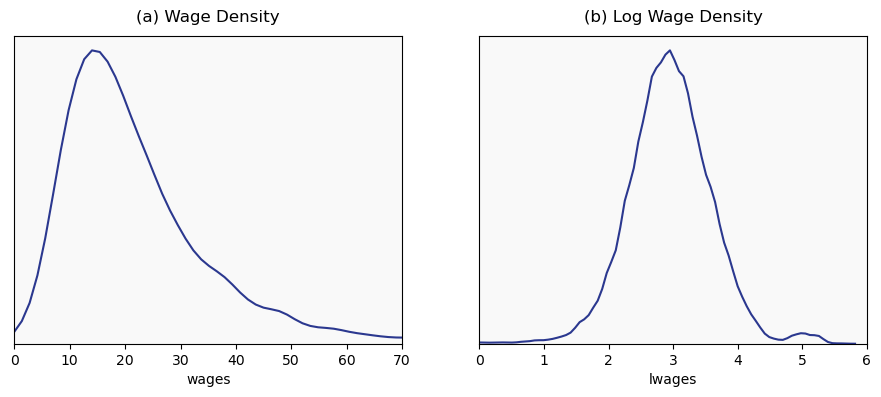

In [7]:
# Hansen (2022) Figure 2.1: Density of Wages and Log Wages

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# (a) Wage Density
sns.kdeplot(cps, x='wages', color=blue4, ax=ax[0])

ax[0].set_title('(a) Wage Density', pad=10)
ax[0].set_facecolor('#F9F9F9')
ax[0].set_xlim([0, 70])
ax[0].set_xmargin(0)
ax[0].set_yticks([]) # Remove y ticks
ax[0].set_ylabel('') # Remove y label

# (b) Log Wage Density
sns.kdeplot(cps, x='lwages', color=blue4, ax=ax[1])

ax[1].set_title('(b) Log Wage Density', pad=10)
ax[1].set_facecolor('#F9F9F9')
ax[1].set_xlim([0, 6])
ax[1].set_xmargin(0)
ax[1].set_yticks([]) # Remove y ticks
ax[1].set_ylabel('') # Remove y label

plt.show()

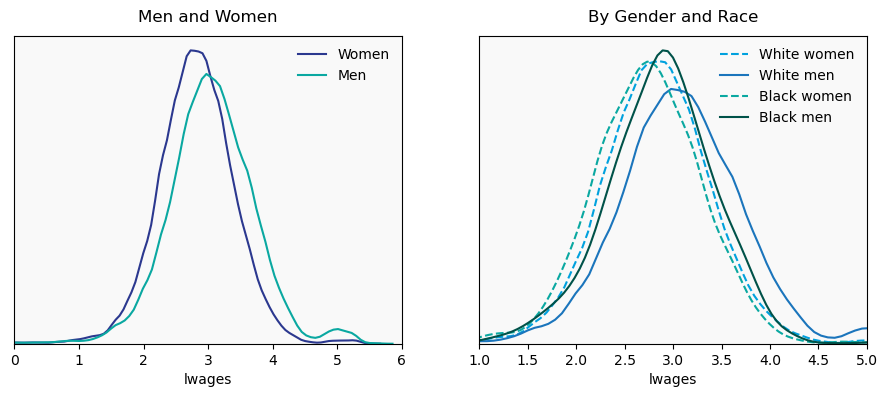

In [8]:
# Hansen (2022) Figure 2.2: Log Wage Density by Gender and Race

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# (a) Women and Men

women = cps.loc[cps.female==1, 'lwages']  # Log wage of women
men = cps.loc[cps.female==0, 'lwages']    # Log wage of men

sns.kdeplot(women, ax=ax[0], legend=False, color=blue4)
sns.kdeplot(men, ax=ax[0], legend=False, color=green1)

ax[0].set_title('Men and Women', pad=10)
ax[0].set_facecolor('#F9F9F9')
ax[0].legend(['Women', 'Men'], frameon=False)
ax[0].set_xlim([0, 6])
ax[0].set_xmargin(0)
ax[0].set_yticks([])
ax[0].set_ylabel('')

# (b) By Gender and Race

ww = cps.loc[(cps.race==1) & (cps.female==1), 'lwages']  # white women
wm = cps.loc[(cps.race==1) & (cps.female==0), 'lwages']  # white men
bw = cps.loc[(cps.race==2) & (cps.female==1), 'lwages']  # black women
bm = cps.loc[(cps.race==2) & (cps.female==0), 'lwages']  # black men
ow = cps.loc[~(cps.race.isin([1, 2])) & (cps.female==1), 'lwages']  # Other women
om = cps.loc[~(cps.race.isin([1, 2])) & (cps.female==0), 'lwages']  # Other men

sns.kdeplot(ww, ax=ax[1], color=blue2, ls='--')
sns.kdeplot(wm, ax=ax[1], color=blue3, ls='-')
sns.kdeplot(bw, ax=ax[1], color=green1, ls='--')
sns.kdeplot(bm, ax=ax[1], color=green2, ls='-')

ax[1].set_title('By Gender and Race', pad=10)
ax[1].set_facecolor('#F9F9F9')
ax[1].legend(['White women', 'White men', 'Black women', 'Black men'], frameon=False)
ax[1].set_xlim([1, 5])
ax[1].set_xmargin(0)
ax[1].set_yticks([])
ax[1].set_ylabel('')

plt.show()

In [9]:
# Hansen (2022) Table 2.1: Mean Log Wages by Gender and Race

pd.DataFrame([[np.mean(wm), np.mean(ww)], 
              [np.mean(bm), np.mean(bw)],
              [np.mean(om), np.mean(ow)]], index=['White', 'Black', 'Other'], columns=['Men', 'Women']) # `np.mean(arr)` is equivalent to `arr.mean()`

,Men,Women
White,3.065787,2.819883
Black,2.864154,2.726742
Other,3.027230,2.858445


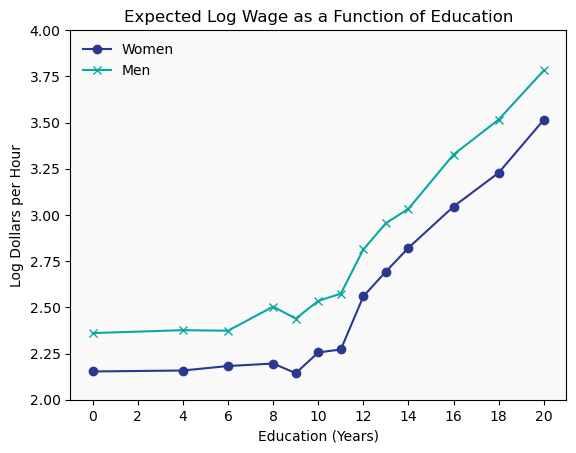

In [10]:
# Hansen (2022) Figure 2.3: Expected Log Wage as a Function of Education

fig, ax = plt.subplots()

women = cps.loc[cps.female==1, ['lwages', 'education']]
men = cps.loc[cps.female==0, ['lwages', 'education']]

women_cat = np.sort(women.education.unique())
men_cat = np.sort(men.education.unique())
women_cef = [np.mean(women.loc[women.education==educ, 'lwages']) for educ in women_cat]
men_cef = [np.mean(men.loc[men.education==educ, 'lwages']) for educ in men_cat]

ax.plot(women_cat, women_cef, label='Women', marker='o', color=blue4)
ax.plot(men_cat, men_cef, label='Men', marker='x', color=green1)

ax.set_title('Expected Log Wage as a Function of Education')
ax.set_facecolor('#F9F9F9')
ax.legend(frameon=False)
ax.set_xlabel('Education (Years)')
ax.set_ylabel('Log Dollars per Hour')
ax.set_ylim([2, 4])
ax.set_xticks(range(0, 22, 2))

plt.show()

## **3.7. Illustration**

In [11]:
# Example 1
# Construct sub-sample of married (spouse present) Black female wage earners with 12 years potential work experience.
married = cps.marital.isin([1, 2])
black = cps.race==2
female = cps.female==1
experience = cps.experience == 12
cond = married & black & female & experience

subsample = cps[cond].reset_index(drop=True)

# Construct dataset as Table 3.1 of Hansen (2022)
## Identical with np.column_stack()
obs = pd.concat([subsample.wages, 
                 subsample.lwages,
                 subsample.education.rename('educ'),
                 (subsample.education**2).rename('educsq'),
                 (subsample.education*subsample.lwages).rename('edxlw')], axis=1)

In [12]:
obs.sum()

wages      514.593606
lwages      62.638508
educ       314.000000
educsq    5010.000000
edxlw      995.858690
dtype: float64

In [13]:
Y = obs.lwages # log(wage)
X = pd.concat([obs.educ, pd.Series(np.ones(20), name='const')], axis=1) # years of education and an intercept

In [14]:
Qxy = X.T @ Y # ΣXY
Qxx = X.T @ X # ΣXX'

print(Qxy)
print(Qxx)

educ     995.858690
const     62.638508
dtype: float64
         educ  const
educ   5010.0  314.0
const   314.0   20.0


In [15]:
β_ols = inv(Qxx) @ Qxy

print(β_ols) # first element denotes the slope coefficient while second one denotes the intercept coefficient.

[0.15503888 0.69781503]


In [16]:
# Hansen (2022a) Chapter 4.19 Table 4.2

## Define the model.
ols = reg.OLS(Y.values, X.values)

## Compute the estimate of β and the standard error.
β_ols = ols.coefficients()
se = ols.standard_errors()

In [93]:
# Example 2
# Construct sub-sample of single (never married) Asian men.
subsample = cps.loc[(cps.marital==7) & (cps.race==4) & (cps.female==0)].reset_index(drop=True)
n = len(subsample)

# Define regressors and a dependent variable.
X = pd.concat([subsample.education.rename('educ'),               # years of education
               subsample.experience.rename('expr'),              # years of potential work experience
               ((subsample.experience**2)/100).rename('exprsq'), # squared years of potential work experience divided by 100
               pd.Series(np.ones(n)).rename('const')], axis=1)
Y = np.log(subsample.wage).rename('lwage')

# Compute β_hat
β_ols = inv(X.T @ X) @ (X.T @ Y)
print(β_ols)

[ 0.14331647  0.03557892 -0.07137808  0.5753563 ]


In [18]:
# Example 3
# Construct sub-sample of individuals with at least 12 years of education.
subsample = cps.loc[cps.education >= 12].reset_index(drop=True)

In [19]:
subsample

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,experience,wages,lwages
0,52,0,0,12,146000,45,52,0,0,1,1,1,34,62.393162,4.133456
1,38,0,0,18,50000,45,52,0,0,1,1,1,14,21.367521,3.061872
2,38,0,0,14,32000,40,51,0,0,1,1,1,18,15.686275,2.752786
3,41,1,0,13,47000,40,52,0,0,1,1,1,22,22.596154,3.117780
4,42,0,0,13,161525,50,52,1,0,1,1,1,23,62.125000,4.129148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46938,45,1,0,16,40000,40,52,0,0,4,4,7,23,19.230769,2.956512
46939,53,1,0,13,38000,40,52,0,0,4,4,5,34,18.269231,2.905218
46940,62,1,0,16,35000,40,52,0,0,4,4,6,40,16.826923,2.822980
46941,58,0,0,12,75000,50,52,0,0,4,1,1,40,28.846154,3.361977
